In [3]:
library(caret)
library(dplyr)

mvpRanks = read.csv('All_player_data.csv')

topPlayers = mvpRanks %>%
  filter((PS.G >= 20 & OBPM >= 0 & DBPM >= 0) | MVP == 1,  season_end < 2012) %>%
  group_by(season_end) %>%
  top_n(5) %>%
  select(player, MVP, GS, PS.G, TRB, AST, STL, BLK, TOV, OBPM, DBPM) 

mvp_glm <- glm(MVP ~ GS + PS.G + TRB + AST + STL + BLK + TOV + OBPM + DBPM, data = topPlayers, family = binomial)

topPlayersTest = mvpRanks %>%
  filter((PS.G >= 20 & OBPM >= 0 & DBPM >= 0) | MVP == 1,  season_end > 2012) %>%
  group_by(season_end) %>%
  top_n(5) %>%
  select(player, MVP, GS, PS.G, TRB, AST, STL, BLK, TOV, OBPM, DBPM) 

# logistic regression
mvp_glm.test = predict(mvp_glm, topPlayersTest[, c('GS', 'PS.G', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'OBPM', 'DBPM')], type="response")

topPlayersTest
mvp_glm.test




Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin


Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Selecting by VORP
Adding missing grouping variables: `season_end`
Selecting by VORP
Adding missing grouping variables: `season_end`


season_end,player,MVP,GS,PS.G,TRB,AST,STL,BLK,TOV,OBPM,DBPM
2013,Kevin Durant,0,81,28.1,7.9,4.6,1.4,1.3,3.5,6.2,1.4
2013,James Harden,0,78,25.9,4.9,5.8,1.8,0.5,3.8,5.4,0.1
2013,LeBron James,1,76,26.8,8.0,7.3,1.7,0.9,3.0,9.2,2.4
2013,Dwyane Wade,0,69,21.2,5.0,5.1,1.9,0.8,2.8,2.8,1.1
2013,Russell Westbrook,0,82,23.2,5.2,7.4,1.8,0.3,3.3,4.7,0.3
2014,Stephen Curry,0,78,24.0,4.3,8.5,1.6,0.2,3.8,7.4,0.0
2014,Kevin Durant,1,81,32.0,7.4,5.5,1.3,0.7,3.5,8.4,0.4
2014,Paul George,0,80,21.7,6.8,3.5,1.9,0.3,2.8,2.9,1.8
2014,LeBron James,0,77,27.1,6.9,6.3,1.6,0.3,3.5,8.0,0.9
2014,Kevin Love,0,77,26.1,12.5,4.4,0.8,0.5,2.5,7.2,1.2


1           2           3           4           5           6 
0.127132763 0.020774874 0.457667357 0.009535212 0.045897392 0.070526639 
          7           8           9          10          11          12 
0.509132707 0.008319603 0.139474893 0.338043491 0.029233089 0.070142212 
         13          14          15 
0.082726278 0.118664333 0.286450402

In [8]:
library(randomForest)
mvp_ranForest <- randomForest(MVP ~ GS + PS.G + TRB + AST + STL + BLK + TOV + OBPM + DBPM, data = topPlayers)
print(mvp_ranForest)
print(importance(mvp_ranForest,type = 2)) 

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


Call:
 randomForest(formula = MVP ~ GS + PS.G + TRB + AST + STL + BLK +      TOV + OBPM + DBPM, data = topPlayers) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 0.1513943
                    % Var explained: -6.1
     IncNodePurity
GS        1.012745
PS.G      2.590721
TRB       1.834472
AST       1.777133
STL       1.409549
BLK       1.178138
TOV       1.465323
OBPM      1.538069
DBPM      1.702721


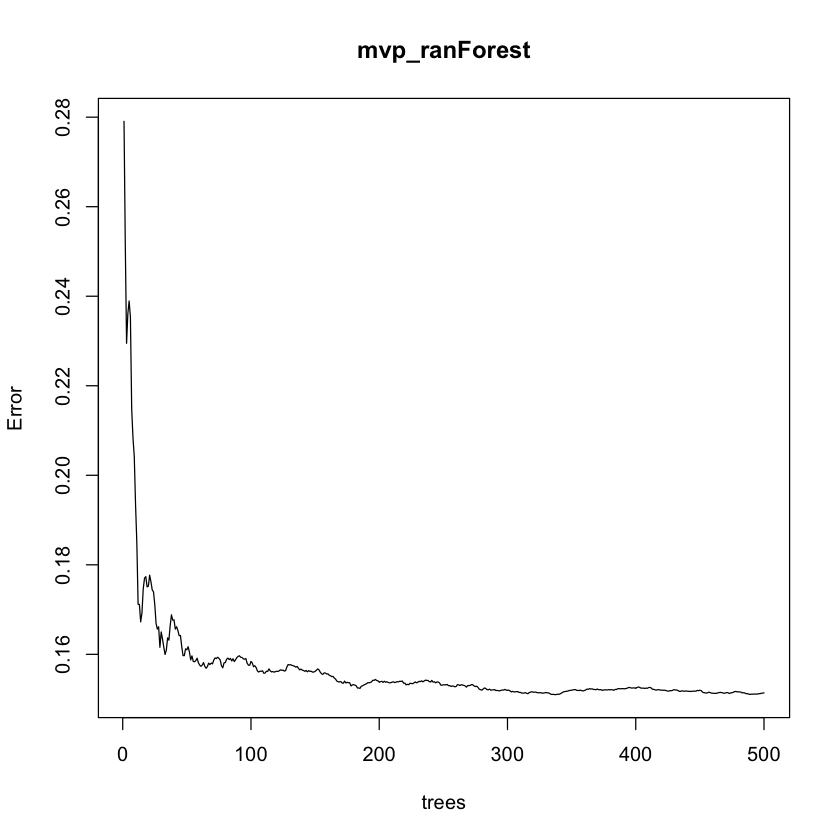

In [9]:
plot(mvp_ranForest)